# 线性回归示例

这个notebook展示了如何使用scikit-learn实现简单的线性回归。

175平方米房屋的预测价格: 350.00万元


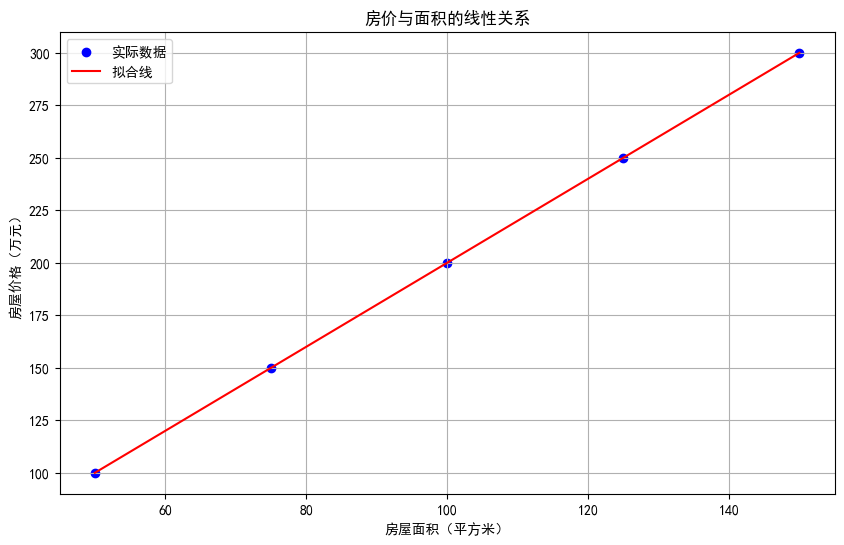

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# 准备示例数据：房屋面积(平方米)和价格(万元)
X = np.array([[50], [75], [100], [125], [150]])  # 房屋面积
y = np.array([100, 150, 200, 250, 300])          # 对应价格

# 创建并训练模型
model = LinearRegression()
model.fit(X, y)

# 预测新房屋的价格
new_area = np.array([[175]])  # 预测175平方米房屋的价格
predicted_price = model.predict(new_area)
print(f"175平方米房屋的预测价格: {predicted_price[0]:.2f}万元")

# 可视化结果
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='实际数据')
plt.plot(X, model.predict(X), color='red', label='拟合线')
plt.xlabel('房屋面积（平方米）')
plt.ylabel('房屋价格（万元）')
plt.title('房价与面积的线性关系')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

# 准备非线性数据
X = np.array([[50], [75], [100], [125], [150]])
y = np.array([100, 200, 400, 700, 1000])  # 价格呈现加速增长

# 创建多项式回归模型
degree = 2  # 使用二次多项式
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X, y)

# 预测新值
new_area = np.array([[175]])
pred_price = polyreg.predict(new_area)
print(f"175平方米房屋的预测价格: {pred_price[0]:.2f}万元")

175平方米房屋的预测价格: 1420.00万元


In [3]:
from sklearn.linear_model import Ridge

# 创建Ridge回归模型
ridge = Ridge(alpha=1.0)  # alpha控制正则化强度
ridge.fit(X, y)

# 预测房价
predictions = ridge.predict(new_area)
print(f"使用Ridge回归的预测价格: {predictions[0]:.2f}万元")

使用Ridge回归的预测价格: 1169.89万元


In [9]:
import pandas as pd
from sklearn.linear_model import Lasso

# 创建Lasso回归模型
lasso = Lasso(alpha=1.0)
lasso.fit(X, y)

# 进行预测
predictions = lasso.predict(new_area)
print(f"预测值: {predictions[0]}")

# 分析特征重要性
feature_importance = pd.DataFrame({
    'feature': ['面积', '年代', '楼层', '朝向', '装修'],
    'importance': abs(lasso.coef_)
})
print("特征重要性排序：")
print(feature_importance.sort_values('importance', ascending=False))

预测值: 1169.94


ValueError: All arrays must be of the same length

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 交叉验证评估
scores = cross_val_score(LinearRegression(), X_scaled, y, cv=5, scoring='r2')
print(f"交叉验证R²分数: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

交叉验证R²分数: nan (+/- nan)


/Users/dreambt/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dreambt/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dreambt/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dreambt/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dreambt/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_regression.py:1266: Undefin

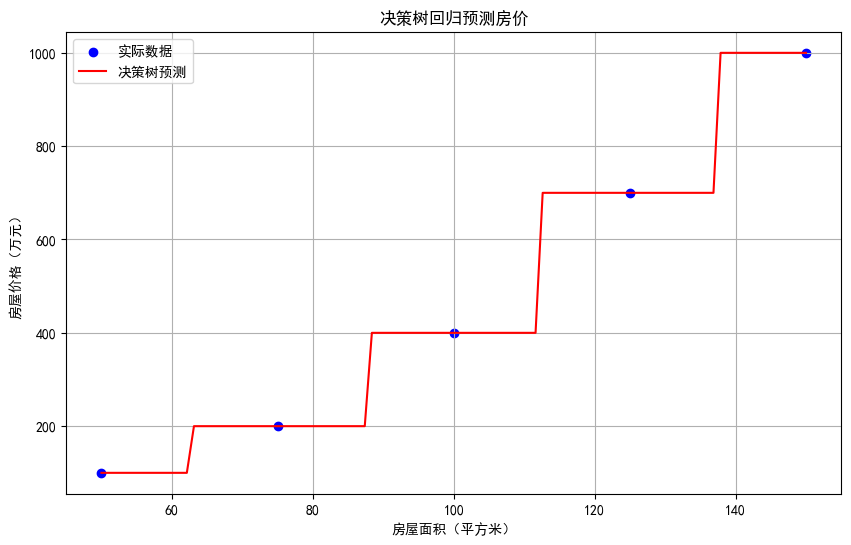

In [10]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# 创建并训练决策树模型
regressor = DecisionTreeRegressor(max_depth=3)  # 限制树的深度，防止过拟合
regressor.fit(X, y)

# 预测并可视化
X_test = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = regressor.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='实际数据')
plt.plot(X_test, y_pred, color='red', label='决策树预测')
plt.xlabel('房屋面积（平方米）')
plt.ylabel('房屋价格（万元）')
plt.title('决策树回归预测房价')
plt.legend()
plt.grid(True)
plt.show()

特征重要性排序：
  feature  importance
0      面积         1.0


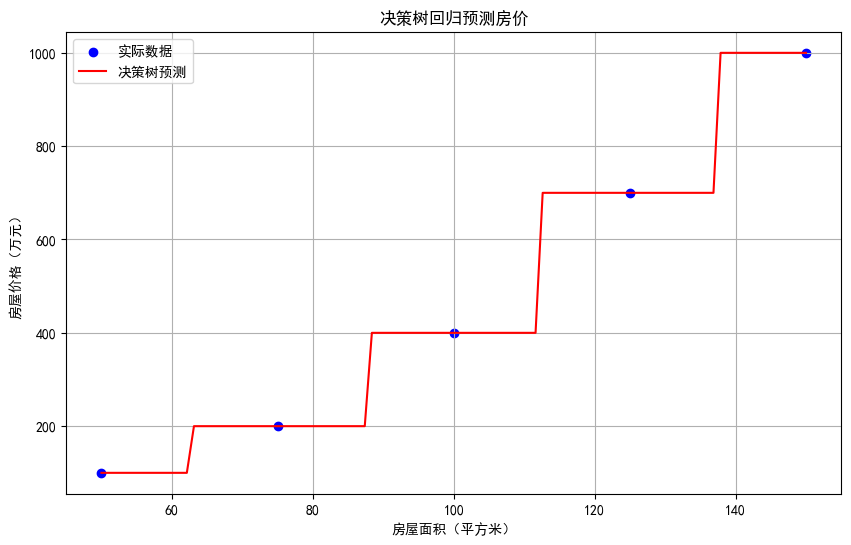

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# 准备非线性数据
X = np.array([[50], [75], [100], [125], [150]])
y = np.array([100, 200, 400, 700, 1000])  # 价格呈现加速增长

# 创建随机森林模型
rf_model = RandomForestRegressor(
    n_estimators=100,    # 使用100个决策树
    max_depth=None,      # 允许树充分生长
    min_samples_split=2, # 分裂所需的最小样本数
    min_samples_leaf=1,  # 叶节点最小样本数
    random_state=42
)

# 训练模型
rf_model.fit(X, y)

# 分析特征重要性
feature_importance = pd.DataFrame({
    'feature': ['面积'],
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("特征重要性排序：")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='实际数据')
plt.plot(X_test, y_pred, color='red', label='决策树预测')
plt.xlabel('房屋面积（平方米）')
plt.ylabel('房屋价格（万元）')
plt.title('随机森林回归预测房价')
plt.legend()
plt.grid(True)
plt.show()

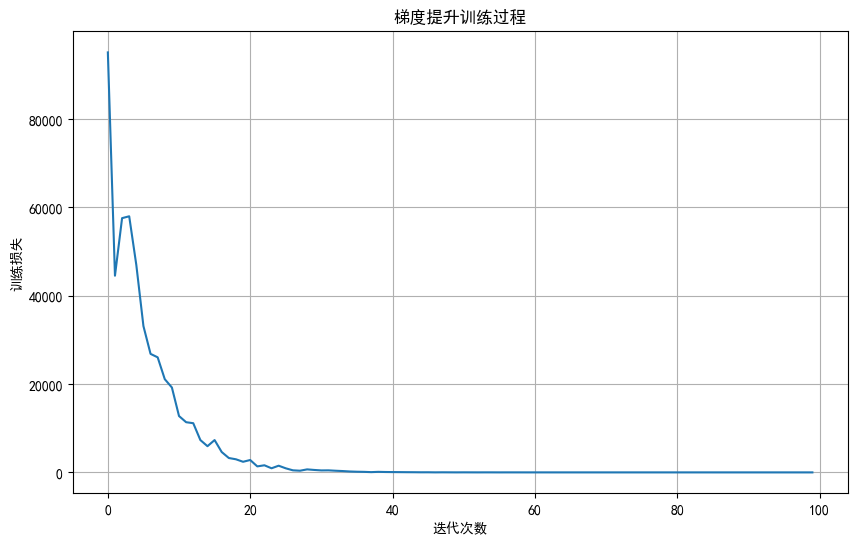

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

# 创建GBM模型
gbm = GradientBoostingRegressor(
    n_estimators=100,   # 迭代次数
    learning_rate=0.1,  # 学习率
    max_depth=3,        # 树的深度
    subsample=0.8,      # 使用80%的样本训练每棵树
    random_state=42
)

# 训练模型并分析学习过程
gbm.fit(X, y)

# 可视化训练过程
plt.figure(figsize=(10, 6))
plt.plot(gbm.train_score_)
plt.xlabel('迭代次数')
plt.ylabel('训练损失')
plt.title('梯度提升训练过程')
plt.grid(True)
plt.show()

In [22]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).ravel()

# 创建SVR模型
svr = SVR(
    kernel='rbf',     # 使用RBF核函数
    C=100,           # 正则化参数
    epsilon=0.1,     # 误差容忍度
    gamma='scale'    # 核函数参数
)

# 训练模型
svr.fit(X_scaled, y_scaled)

# 预测并还原结果
y_pred = svr.predict(scaler.transform(X_test))
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name}评估结果:")
    print(f"均方根误差 (RMSE): {rmse:.2f}万元")
    print(f"平均绝对误差 (MAE): {mae:.2f}万元")
    print(f"R²得分: {r2:.4f}")

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 加载房产数据
# df = pd.read_csv('house_data.csv')

# 特征工程
# features = ['面积', '位置评分', '房龄', '楼层', '装修程度']
# X = df[features]
X0 = np.array([[50, 7, 20, 4, 5], [75, 4, 10, 2, 3], [100, 5, 5, 6, 2], [125, 3, 8, 4, 4], [150, 3, 15, 3, 1]])
y0 = np.array([100, 200, 400, 700, 1000])  # 价格呈现加速增长

# 将NumPy数组转换为DataFrame，并指定列名
X = pd.DataFrame(X0, columns=['面积', '位置评分', '房龄', '楼层', '装修程度'])
y = pd.DataFrame(y0, columns=['价格'])

# 数据预处理
X = X.fillna(X.mean())  # 处理缺失值
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 创建模型字典
models = {
    '线性回归': LinearRegression(),
    '随机森林': RandomForestRegressor(n_estimators=100, random_state=42),
    '梯度提升': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf', C=100)
}

# 评估各个模型
results = {}
for name, model in models.items():
    # 训练与预测
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    evaluate_model(y_test, predictions, name)


线性回归评估结果:
均方根误差 (RMSE): 430.71万元
平均绝对误差 (MAE): 430.71万元
R²得分: nan

随机森林评估结果:
均方根误差 (RMSE): 314.00万元
平均绝对误差 (MAE): 314.00万元
R²得分: nan

梯度提升评估结果:
均方根误差 (RMSE): 72.99万元
平均绝对误差 (MAE): 72.99万元
R²得分: nan

SVR评估结果:
均方根误差 (RMSE): 372.20万元
平均绝对误差 (MAE): 372.20万元
R²得分: nan


/Users/dreambt/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dreambt/Library/Python/3.11/lib/python/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/dreambt/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/dreambt/Library/Python/3.11/lib/python/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, 